# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL #ME after =
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city #ME after =
    city_url = f'{url}q={city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": (city_max_temp - 273.15),
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": datetime.utcfromtimestamp(int(city_date)).strftime('%m-%d-%Y')})

    # If an error is experienced, skip the city
    except Exception as e:
        print(e)
        #print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mingyue
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | chulakkurgan
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | gaomi
Processing Record 6 of Set 1 | margaret river
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | yuzhno-kurilsk
Processing Record 9 of Set 1 | phek
Processing Record 10 of Set 1 | puerto san carlos
'coord'
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | severo-yeniseyskiy
Processing Record 13 of Set 1 | kapuskasing
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | sheridan
Processing Record 16 of Set 1 | mahibadhoo
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | papatowai
Processing Record 20 of Set 1 | vorkuta
Processing Record 21 of Set 1 | waitangi
Processing Recor

Processing Record 43 of Set 4 | touros
Processing Record 44 of Set 4 | bang saphan
Processing Record 45 of Set 4 | kuqa
Processing Record 46 of Set 4 | zeya
Processing Record 47 of Set 4 | dunedin
Processing Record 48 of Set 4 | asau village
'coord'
Processing Record 49 of Set 4 | saint-philippe
Processing Record 0 of Set 5 | tanrake village
'coord'
Processing Record 1 of Set 5 | keflavik
Processing Record 2 of Set 5 | aykhal
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | tevragh zeina
'coord'
Processing Record 5 of Set 5 | khost
Processing Record 6 of Set 5 | san luis de la loma
Processing Record 7 of Set 5 | weno
Processing Record 8 of Set 5 | garoua
Processing Record 9 of Set 5 | utrik
Processing Record 10 of Set 5 | kristiansund
Processing Record 11 of Set 5 | klyuchi
Processing Record 12 of Set 5 | santiago
Processing Record 13 of Set 5 | belmonte
Processing Record 14 of Set 5 | santo rosario
Processing Record 15 of Set 5 | saudarkrokur
Processing Record 16 

Processing Record 35 of Set 8 | veraval
Processing Record 36 of Set 8 | rongelap
Processing Record 37 of Set 8 | mandalgovi
Processing Record 38 of Set 8 | bom jardim
Processing Record 39 of Set 8 | itupiranga
Processing Record 40 of Set 8 | lompoc
Processing Record 41 of Set 8 | fuvahmulah
'coord'
Processing Record 42 of Set 8 | hultsfred
Processing Record 43 of Set 8 | taulaga
Processing Record 44 of Set 8 | kirensk
Processing Record 45 of Set 8 | cruzeiro do sul
Processing Record 46 of Set 8 | gustavsberg
Processing Record 47 of Set 8 | justo daract
Processing Record 48 of Set 8 | hazorasp
Processing Record 49 of Set 8 | saint-flour
Processing Record 0 of Set 9 | quellon
Processing Record 1 of Set 9 | huilong
Processing Record 2 of Set 9 | west milford
Processing Record 3 of Set 9 | haimen
('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
Processing Record 4 of Set 9 | walvis bay
Processing Record

Processing Record 26 of Set 12 | al kharijah
Processing Record 27 of Set 12 | pante makasar
'coord'
Processing Record 28 of Set 12 | aitape
Processing Record 29 of Set 12 | temara
Processing Record 30 of Set 12 | onguday
Processing Record 31 of Set 12 | chifeng
Processing Record 32 of Set 12 | idri
Processing Record 33 of Set 12 | lao cai
Processing Record 34 of Set 12 | manokwari
Processing Record 35 of Set 12 | mega
Processing Record 36 of Set 12 | forster
Processing Record 37 of Set 12 | houlton
Processing Record 38 of Set 12 | laukaa
Processing Record 39 of Set 12 | le grau-du-roi
Processing Record 40 of Set 12 | ponta delgada
Processing Record 41 of Set 12 | al mindak
Processing Record 42 of Set 12 | dudinka
Processing Record 43 of Set 12 | murun-kuren
Processing Record 44 of Set 12 | eduardo castex
Processing Record 45 of Set 12 | anisoc
Processing Record 46 of Set 12 | pizarro
Processing Record 47 of Set 12 | kikwit
Processing Record 48 of Set 12 | altamont
Processing Record 49 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mingyue,43.1069,128.9217,11.00,58,100,3.39,CN,04-27-2023
1,grytviken,-54.2811,-36.5092,3.18,92,47,4.25,GS,04-27-2023
2,chulakkurgan,43.7650,69.1814,20.09,23,0,5.10,KZ,04-27-2023
3,puerto natales,-51.7236,-72.4875,6.25,87,100,5.14,CL,04-27-2023
4,gaomi,36.3833,119.7528,12.25,79,16,5.82,CN,04-27-2023


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mingyue,43.1069,128.9217,11.00,58,100,3.39,CN,04-27-2023
1,grytviken,-54.2811,-36.5092,3.18,92,47,4.25,GS,04-27-2023
2,chulakkurgan,43.7650,69.1814,20.09,23,0,5.10,KZ,04-27-2023
3,puerto natales,-51.7236,-72.4875,6.25,87,100,5.14,CL,04-27-2023
4,gaomi,36.3833,119.7528,12.25,79,16,5.82,CN,04-27-2023


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

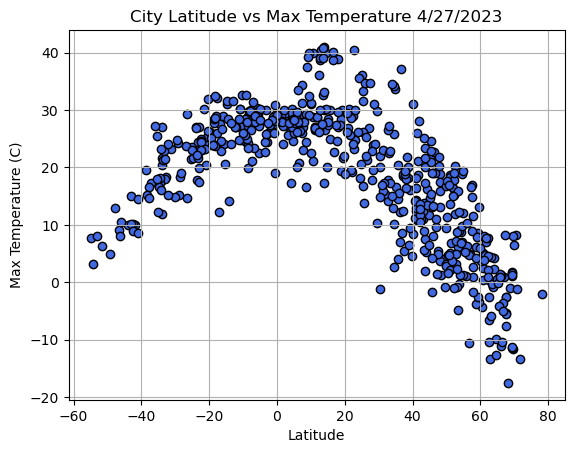

In [16]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Max Temp"].astype("float")
plt.scatter(x_values, y_values, marker='o', edgecolor='black', linewidth=1, facecolor='royalblue')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature 4/27/2023")
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

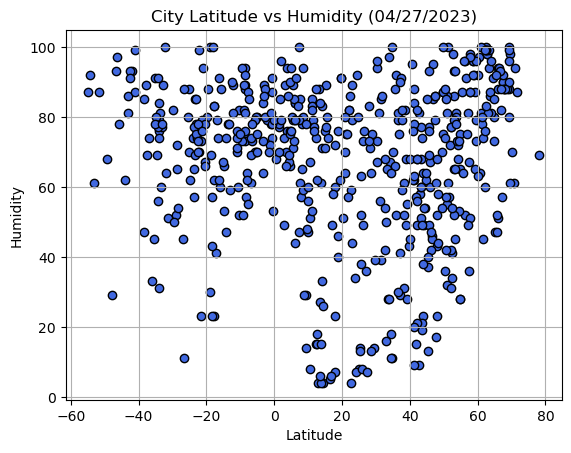

In [17]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Humidity"].astype("float")
plt.scatter(x_values, y_values, marker='o', edgecolor='black', linewidth=1, facecolor='royalblue')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (04/27/2023)")
plt.xlabel("Latitude")
plt.ylabel('Humidity')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

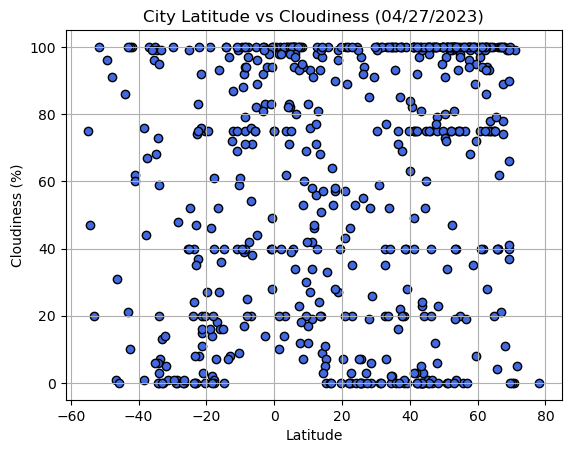

In [18]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Cloudiness"].astype("float")
plt.scatter(x_values, y_values, marker='o', edgecolor='black', linewidth=1, facecolor='royalblue')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (04/27/2023)")
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

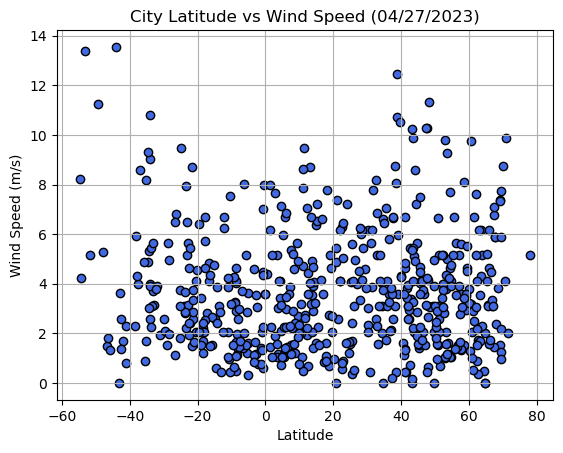

In [19]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Wind Speed"].astype("float")
plt.scatter(x_values, y_values, marker='o', edgecolor='black', linewidth=1, facecolor='royalblue')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (04/27/2023)")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots with equation in lower left
def Lin_Regress_lowl(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,xy=(min(x_values), min(y_values)), horizontalalignment='left', verticalalignment='bottom',
                 fontsize=15,color="red", weight='bold')
    print(f"The r-value is: {rvalue**2}")
    


In [34]:
# Define a function to create Linear Regression plots with equation in Upper Left
def Lin_Regress_upl(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,xy=(min(x_values), max(y_values)), horizontalalignment='left', verticalalignment='top',
                 fontsize=15,color="red", weight='bold')
    print(f"The r-value is: {rvalue**2}")

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mingyue,43.1069,128.9217,11.00,58,100,3.39,CN,04-27-2023
2,chulakkurgan,43.7650,69.1814,20.09,23,0,5.10,KZ,04-27-2023
4,gaomi,36.3833,119.7528,12.25,79,16,5.82,CN,04-27-2023
7,yuzhno-kurilsk,44.0306,145.8556,5.33,64,3,4.93,RU,04-27-2023
8,phek,25.6667,94.5000,13.86,63,7,0.36,IN,04-27-2023


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,3.18,92,47,4.25,GS,04-27-2023
3,puerto natales,-51.7236,-72.4875,6.25,87,100,5.14,CL,04-27-2023
5,margaret river,-33.9500,115.0667,11.87,76,59,4.00,AU,04-27-2023
6,port-aux-francais,-49.3500,70.2167,4.92,68,96,11.26,TF,04-27-2023
16,edinburgh of the seven seas,-37.0676,-12.3116,17.27,74,100,8.60,SH,04-27-2023


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6962196641137017


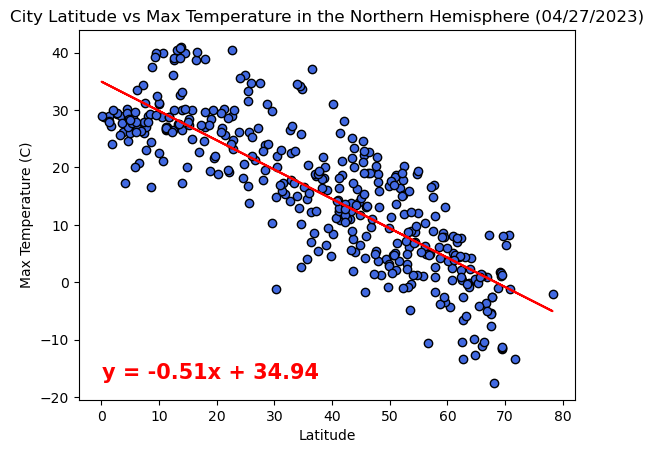

In [24]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Max Temp"].astype("float")
plt.scatter(x_values, y_values, marker='o', edgecolor='black', linewidth=1, facecolor='royalblue')
# line Regress
Lin_Regress_lowl(x_values, y_values)
# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature in the Northern Hemisphere (04/27/2023)")
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (C)')


plt.show()

The r-value is: 0.6202687727828172


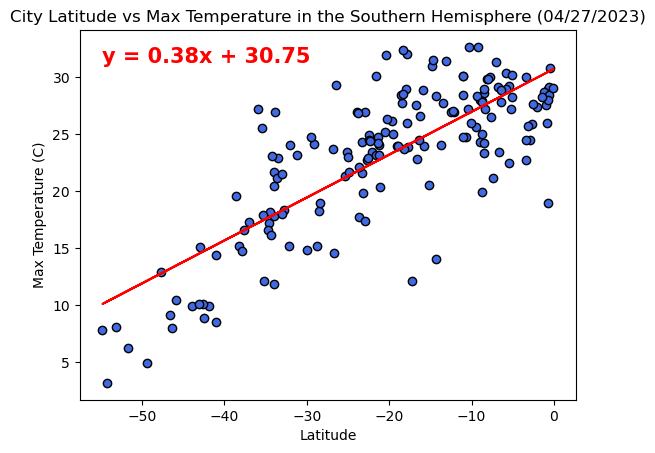

In [35]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Max Temp"].astype("float")
plt.scatter(x_values, y_values, marker='o', edgecolor='black', linewidth=1, facecolor='royalblue')
# line Regress
Lin_Regress_upl(x_values, y_values)
# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature in the Southern Hemisphere (04/27/2023)")
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (C)')


plt.show()

**Discussion about the linear relationship:**
In the relationship between Latitude and Max Temperature, the Northern Hemispere has a negative linear relationship; as the latitude increases, the temperature goes down. For the Southern Hemisphere, the relationship is positive; as the latitude increases, the temperature likewise increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.04326521383446584


Text(0, 0.5, 'Humidity')

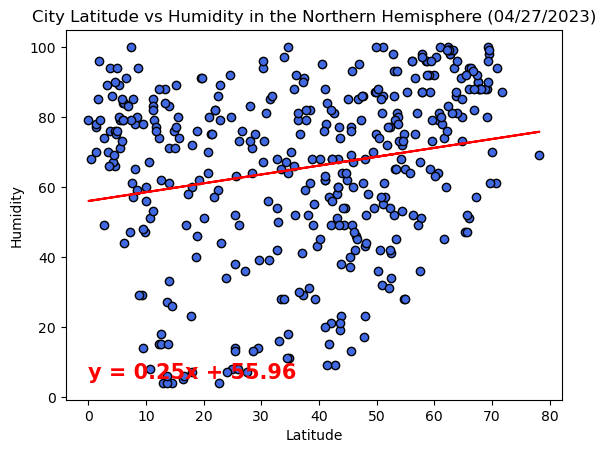

In [36]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Humidity"].astype("float")
plt.scatter(x_values, y_values, marker='o', edgecolor='black', linewidth=1, facecolor='royalblue')

#LinRegress
Lin_Regress_lowl(x_values, y_values)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity in the Northern Hemisphere (04/27/2023)")
plt.xlabel("Latitude")
plt.ylabel('Humidity')

The r-value is: 0.00012500694769729473


Text(0, 0.5, 'Humidity')

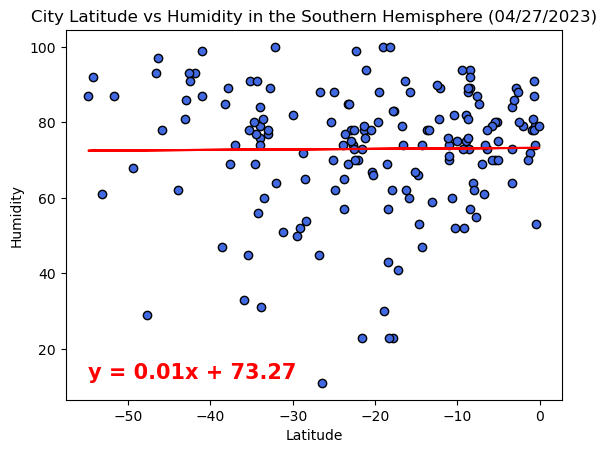

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Humidity"].astype("float")
plt.scatter(x_values, y_values, marker='o', edgecolor='black', linewidth=1, facecolor='royalblue')

#LinRegress
Lin_Regress_lowl(x_values, y_values)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity in the Southern Hemisphere (04/27/2023)")
plt.xlabel("Latitude")
plt.ylabel('Humidity')

**Discussion about the linear relationship:** There appears to be no consistent relationship for either the Northern or Southern Hemisphere between Latitude and Humidity. However, the Southern Hemisphere appears to have less range in humidity no matter the latitude, but I would not declare it consistent as there is the potential that the visual is effected by the less Southern data points in my random sampling. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.013023919755743251


Text(0, 0.5, 'Cloudiness (%)')

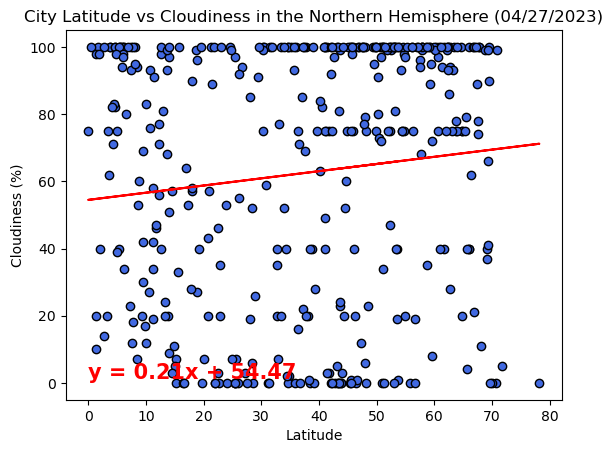

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Cloudiness"].astype("float")
plt.scatter(x_values, y_values, marker='o', edgecolor='black', linewidth=1, facecolor='royalblue')

#LinRegress
Lin_Regress_lowl(x_values, y_values)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness in the Northern Hemisphere (04/27/2023)")
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')

The r-value is: 0.04686327453235306


Text(0, 0.5, 'Cloudiness (%)')

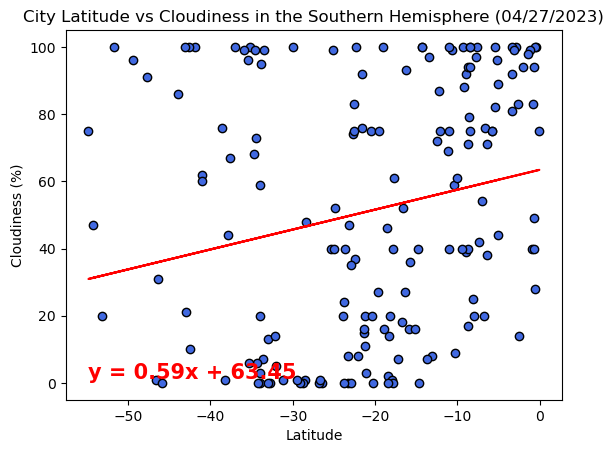

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Cloudiness"].astype("float")
plt.scatter(x_values, y_values, marker='o', edgecolor='black', linewidth=1, facecolor='royalblue')

#LinRegress
Lin_Regress_lowl(x_values, y_values)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness in the Southern Hemisphere (04/27/2023)")
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')

**Discussion about the linear relationship:** There appears to be no consistent relationship for either the Northern or Southern Hemisphere between Latitude and Cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0020262516300010125


Text(0, 0.5, 'Wind Speed (m/s)')

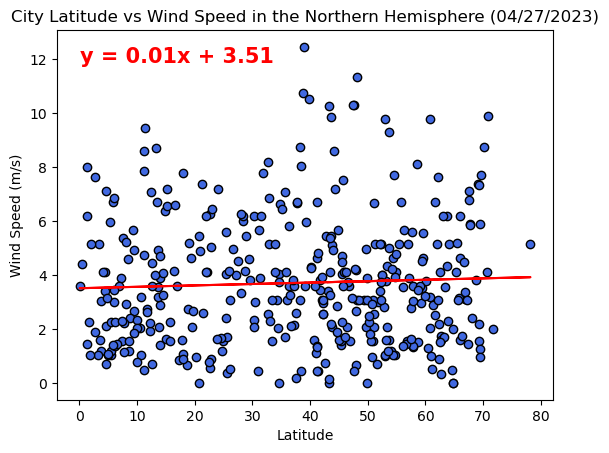

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Wind Speed"].astype("float")
plt.scatter(x_values, y_values, marker='o', edgecolor='black', linewidth=1, facecolor='royalblue')
# line Regress
Lin_Regress_upl(x_values, y_values)
# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed in the Northern Hemisphere (04/27/2023)")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (m/s)')

The r-value is: 0.1070246039947127


Text(0, 0.5, 'Wind Speed (m/s)')

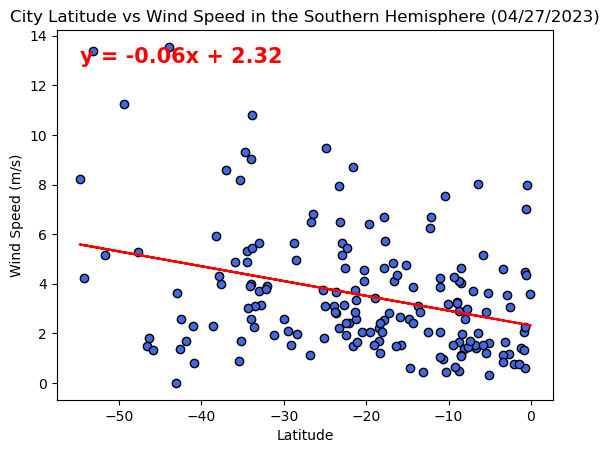

In [45]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Wind Speed"].astype("float")
plt.scatter(x_values, y_values, marker='o', edgecolor='black', linewidth=1, facecolor='royalblue')
# line Regress
Lin_Regress_upl(x_values, y_values)
# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed in the Southern Hemisphere (04/27/2023)")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (m/s)')

**Discussion about the linear relationship:** The Northern Hemisphere does not seem to have much of a relationship with Latitude and Wind Speed but the Southern Hemisphere appears to have more consistent gathering of low speeds near the high end of Latitude. Again, that may be skewed by an unequal count of Southern data points. 